# "Insightful Analysis of Goodreads Books: Uncovering Trends in Ratings, Reviews, and Popularity"

Project ini menganalisis dataset Goodreads untuk mengungkap tren utama dalam literatur, termasuk distribusi rating, ulasan, popularitas penulis, serta penerbit teratas. Melalui eksplorasi data, project ini menggali pola dalam rating pembaca, jumlah ulasan, bahasa yang digunakan, dan tren penerbitan buku dari tahun ke tahun. 

In [1]:
# import library
import pandas as pd
import numpy as np

# load dataset
file_path = 'books.csv'
books_df = pd.read_csv(file_path, on_bad_lines='skip')

# menampikan 5 baris pertama dataset
books_df.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic


# Eksplorasi Awal & Informasi Data

In [2]:
# Melihat informasi umuum dataset

books_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11123 entries, 0 to 11122
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bookID              11123 non-null  int64  
 1   title               11123 non-null  object 
 2   authors             11123 non-null  object 
 3   average_rating      11123 non-null  float64
 4   isbn                11123 non-null  object 
 5   isbn13              11123 non-null  int64  
 6   language_code       11123 non-null  object 
 7     num_pages         11123 non-null  int64  
 8   ratings_count       11123 non-null  int64  
 9   text_reviews_count  11123 non-null  int64  
 10  publication_date    11123 non-null  object 
 11  publisher           11123 non-null  object 
dtypes: float64(1), int64(5), object(6)
memory usage: 1.0+ MB


In [3]:
#Melihat statistik dasar dataset

books_df.describe()

,bookID,average_rating,isbn13,num_pages,ratings_count,text_reviews_count
count,11123.000000,11123.000000,1.112300e+04,11123.000000,1.112300e+04,11123.000000
mean,21310.856963,3.934075,9.759880e+12,336.405556,1.794285e+04,542.048099
std,13094.727252,0.350485,4.429758e+11,241.152626,1.124992e+05,2576.619589
min,1.000000,0.000000,8.987060e+09,0.000000,0.000000e+00,0.000000
25%,10277.500000,3.770000,9.780345e+12,192.000000,1.040000e+02,9.000000
50%,20287.000000,3.960000,9.780582e+12,299.000000,7.450000e+02,47.000000
75%,32104.500000,4.140000,9.780872e+12,416.000000,5.000500e+03,238.000000
max,45641.000000,5.000000,9.790008e+12,6576.000000,4.597666e+06,94265.000000


In [4]:
# Melihat jumlah nilai unik disetiap kolom

for column in books_df.columns:
        print(f"{column} : {books_df[column].nunique()} unique values")

bookID : 11123 unique values
title : 10348 unique values
authors : 6639 unique values
average_rating : 209 unique values
isbn : 11123 unique values
isbn13 : 11123 unique values
language_code : 27 unique values
  num_pages : 997 unique values
ratings_count : 5294 unique values
text_reviews_count : 1822 unique values
publication_date : 3679 unique values
publisher : 2290 unique values


# Pembersihan Data (Data Cleaning)

In [5]:
# Menghapus kolom yang tidak relevan

books_df.drop(columns=['isbn', 'isbn13'], inplace=True, errors='ignore')
books_df.head()

,bookID,title,authors,average_rating,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,eng,352,6333,244,11/1/2003,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,eng,2690,41428,164,9/13/2004,Scholastic


In [6]:
# Menhgapus spasi yang terdapad pada awal, akhir, dan di antara nama kolom

books_df.columns = books_df.columns.str.replace(' ','')

In [7]:
# Menghitung jumlah missing value

books_df.isnull().sum()

bookID                0
title                 0
authors               0
average_rating        0
language_code         0
num_pages             0
ratings_count         0
text_reviews_count    0
publication_date      0
publisher             0
dtype: int64

In [8]:
# Mengkonversi type data publication_date menjadi datetime

books_df['publication_date'] = pd.to_datetime(books_df['publication_date'], errors = 'coerce')

# Menyaring kolom tahun untuk analisis tren
books_df['publication_year']=books_df['publication_date'].dt.year

In [9]:
# Mengecek kembali type data yang sudah diubah

books_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11123 entries, 0 to 11122
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   bookID              11123 non-null  int64         
 1   title               11123 non-null  object        
 2   authors             11123 non-null  object        
 3   average_rating      11123 non-null  float64       
 4   language_code       11123 non-null  object        
 5   num_pages           11123 non-null  int64         
 6   ratings_count       11123 non-null  int64         
 7   text_reviews_count  11123 non-null  int64         
 8   publication_date    11121 non-null  datetime64[ns]
 9   publisher           11123 non-null  object        
 10  publication_year    11121 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(4), object(4)
memory usage: 956.0+ KB


# Analisis Deskriptif

In [10]:
# Mencari rata-rata rating dan jumlah rating rata-rata
avg_rating = books_df['average_rating'].mean()
avg_ratings_count = books_df['ratings_count'].mean()

print(f"Average Rating of Books : {avg_rating:.2f}")
print(f"Average Ratings Count : {avg_ratings_count:.2f}")

Average Rating of Books : 3.93
Average Ratings Count : 17942.85


In [11]:
# menghitung nilai rata-rata, median, dan modus di setiap kolom numerical

numerical_columns = ['average_rating', 'num_pages', 'ratings_count', 'text_reviews_count']

for column in numerical_columns :
    mean_value = books_df[column].mean()
    median_value = books_df[column].median()
    mode_value = books_df[column].mode()[0] # mengambil nilai  modus pertama jika terdapat lebih dari satu modus
    print(f"{column}:")
    print(f" mean : {mean_value:.2f}")
    print(f" median : {median_value}")
    print(f" mode : {mode_value}\n")
    

average_rating:
 mean : 3.93
 median : 3.96
 mode : 4.0

num_pages:
 mean : 336.41
 median : 299.0
 mode : 288

ratings_count:
 mean : 17942.85
 median : 745.0
 mode : 3

text_reviews_count:
 mean : 542.05
 median : 47.0
 mode : 0



In [12]:
# menghitung nilai minimum dan maksimum pada setiap kolom numerikal

for column in numerical_columns:
    min_value = books_df[column].min()
    max_value = books_df[column].max()
    print(f"{column}:")
    print(f" Min : {min_value}")
    print(f" Max : {max_value}\n")

average_rating:
 Min : 0.0
 Max : 5.0

num_pages:
 Min : 0
 Max : 6576

ratings_count:
 Min : 0
 Max : 4597666

text_reviews_count:
 Min : 0
 Max : 94265



In [13]:
# Menampilkan distribusi frekuensi untuk kolom kategorikal

categorikal_columns = ['language_code', 'authors', 'publisher']

for column in categorikal_columns:
    print(f"Distribution of {column} (top 10) :")
    print(books_df[column].value_counts().head(10))
    print("\n")

Distribution of language_code (top 10) :
language_code
eng      8908
en-US    1408
spa       218
en-GB     214
fre       144
ger        99
jpn        46
mul        19
zho        14
grc        11
Name: count, dtype: int64


Distribution of authors (top 10) :
authors
Stephen King        40
P.G. Wodehouse      40
Rumiko Takahashi    39
Orson Scott Card    35
Agatha Christie     33
Piers Anthony       30
Sandra Brown        29
Mercedes Lackey     29
Dick Francis        28
Terry Pratchett     23
Name: count, dtype: int64


Distribution of publisher (top 10) :
publisher
Vintage             318
Penguin Books       261
Penguin Classics    184
Mariner Books       150
Ballantine Books    144
Harper Perennial    112
HarperCollins       112
Pocket Books        111
Bantam              110
VIZ Media LLC        88
Name: count, dtype: int64




In [14]:
# Menghitung korelasi antar kolom numerik

Correlation_Matrix = books_df[numerical_columns].corr()
print("Correlation_Matrix :")
print(Correlation_Matrix)

Correlation_Matrix :
                    average_rating  num_pages  ratings_count  \
average_rating            1.000000   0.150477       0.038224   
num_pages                 0.150477   1.000000       0.034337   
ratings_count             0.038224   0.034337       1.000000   
text_reviews_count        0.033663   0.036977       0.865977   

                    text_reviews_count  
average_rating                0.033663  
num_pages                     0.036977  
ratings_count                 0.865977  
text_reviews_count            1.000000  


# Analisis Visualisasi

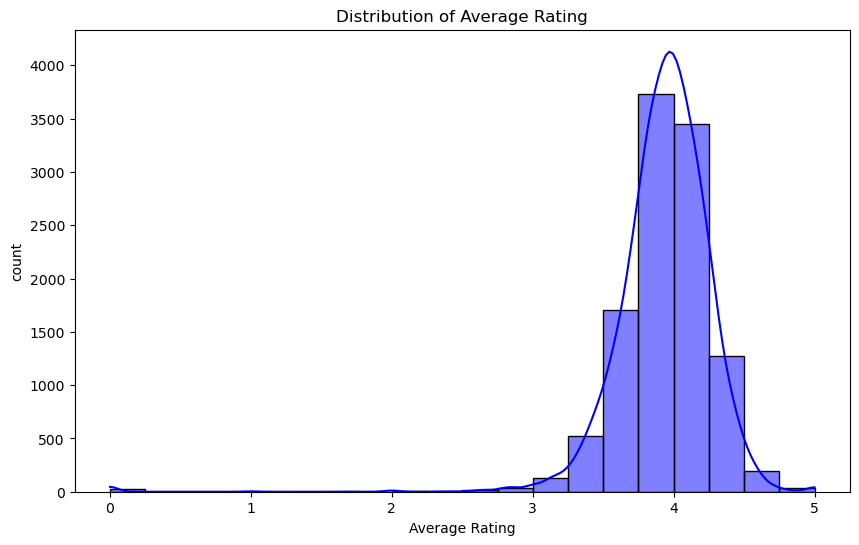

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

#visualisasi distribusi rating rata-rata
plt.figure(figsize=(10,6))
sns.histplot(books_df['average_rating'], bins=20, kde=True, color='blue')
plt.title('Distribution of Average Rating')
plt.xlabel('Average Rating')
plt.ylabel('count')
plt.show()

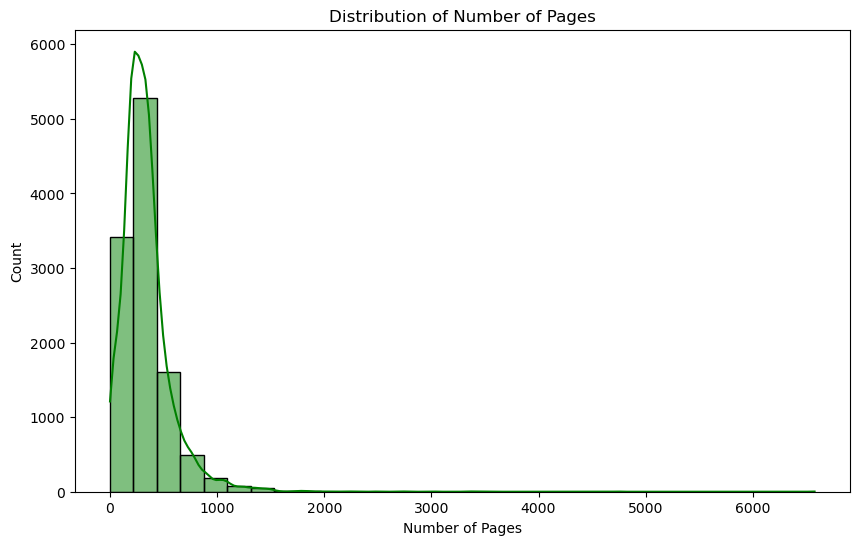

In [35]:
# Visualisasi distribusi jumlah halaman

plt.figure(figsize=(10, 6))
sns.histplot(books_df['num_pages'].dropna(), bins=30, kde=True, color="green")
plt.title('Distribution of Number of Pages')
plt.xlabel('Number of Pages')
plt.ylabel('Count')
plt.show()

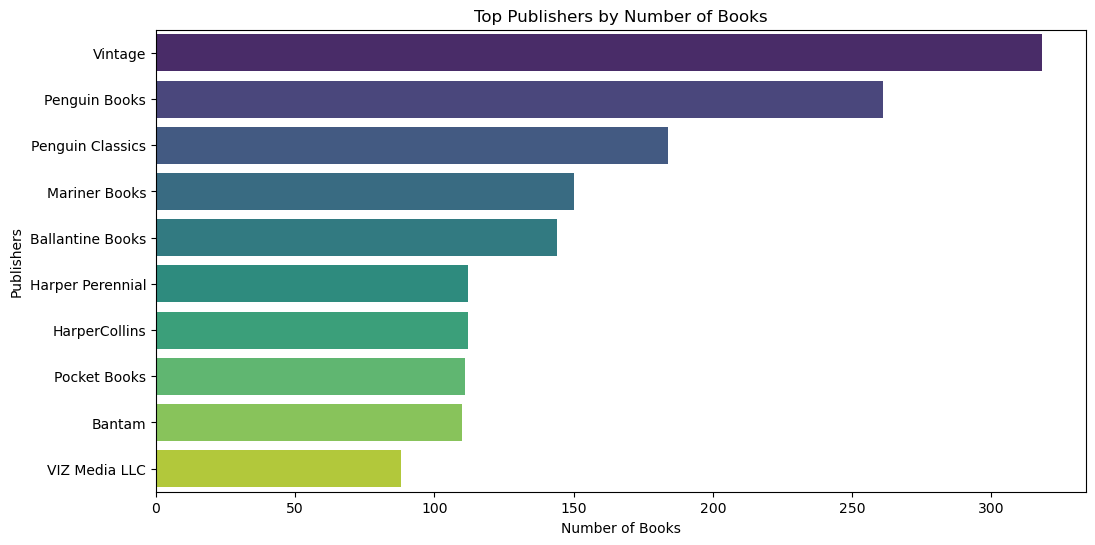

In [22]:
#Menampilkan top publisher berdasarkan jumlah buku

top_publisher = books_df['publisher'].value_counts().head(10)

plt.figure(figsize=(12,6))
sns.barplot(y=top_publisher.index, x=top_publisher.values, palette='viridis')
plt.title('Top Publishers by Number of Books')
plt.xlabel('Number of Books')
plt.ylabel('Publishers')
plt.show()

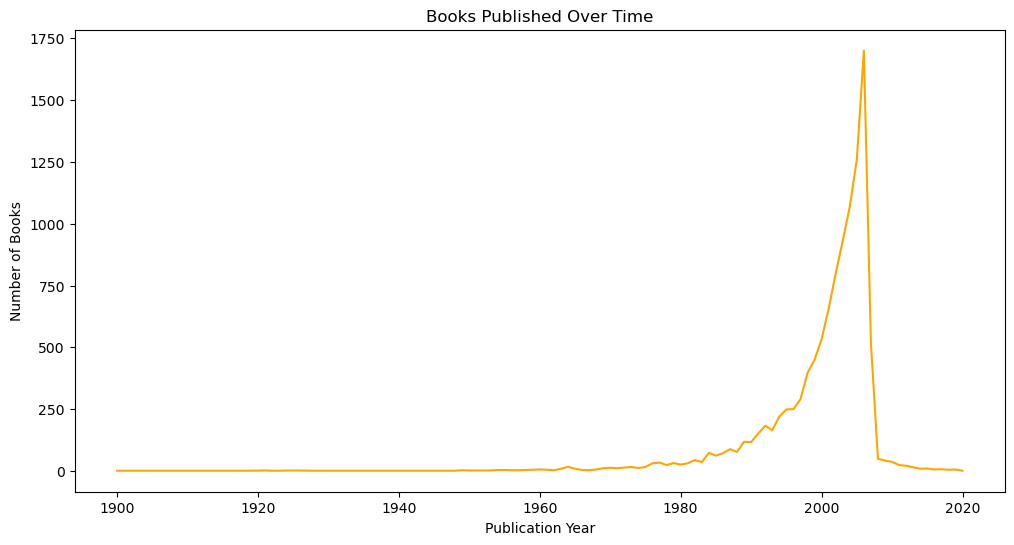

In [28]:
# Menghitung jumlah buku yang diterbitkan per tahun

Books_per_year = books_df['publication_year'].value_counts().sort_index()

plt.figure(figsize=(12,6))
sns.lineplot(x=Books_per_year.index, y=Books_per_year.values, color='orange')
plt.title('Books Published Over Time')
plt.xlabel('Publication Year')
plt.ylabel('Number of Books')
plt.show()

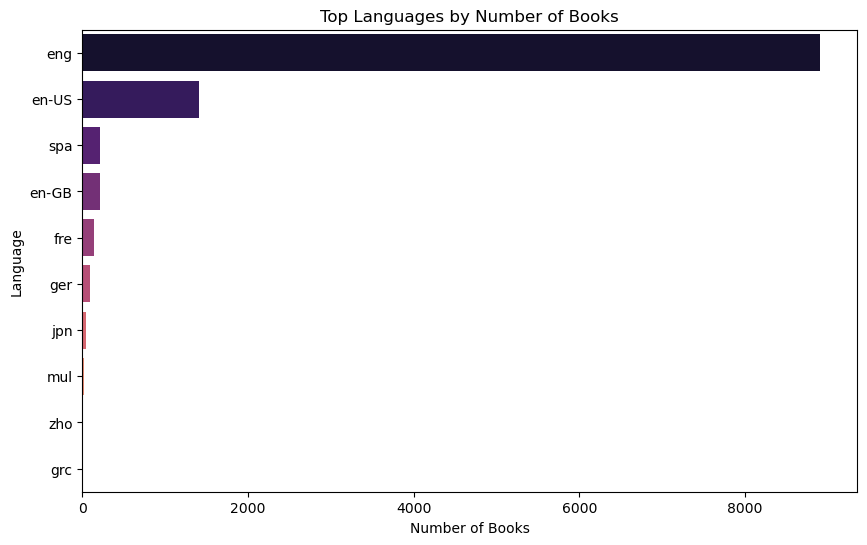

In [38]:
# Menghitung frekuensi bahasa dan menampilkan 10 bahasa terbanyak
top_languages = books_df['language_code'].value_counts().head(10)

# Visualisasi bahasa buku teratas
plt.figure(figsize=(10, 6))
sns.barplot(y=top_languages.index, x=top_languages.values, palette="magma")
plt.title("Top Languages by Number of Books")
plt.xlabel("Number of Books")
plt.ylabel("Language")
plt.show()


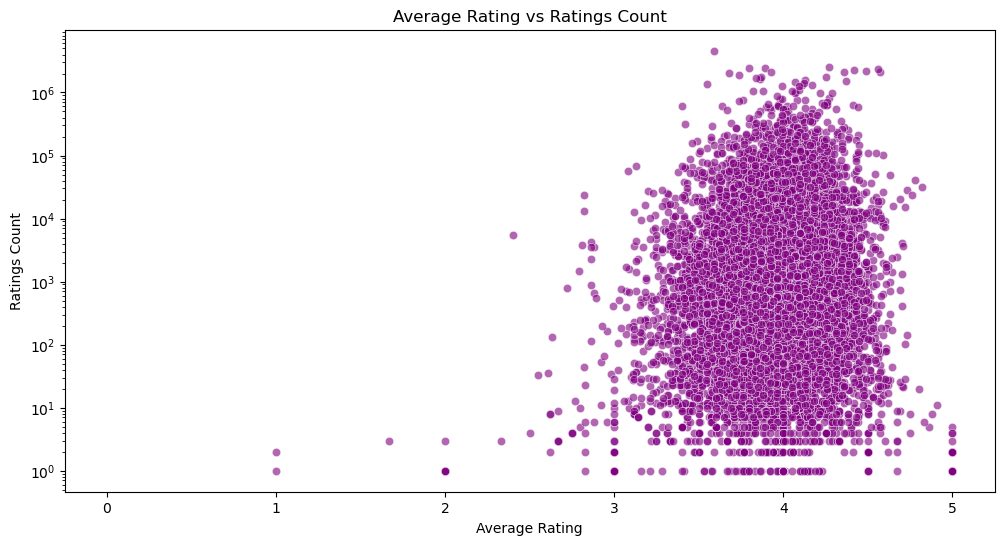

In [31]:
# Scatter plot untuk melihat hubungan antara average rating dan ratings count

plt.figure(figsize=(12,6))
sns.scatterplot(data=books_df, x='average_rating', y='ratings_count', alpha=0.6, color='purple')
plt.yscale('log') # Menggunakan skala logaritmik untuk memperjelas distribusi
plt.title('Average Rating vs Ratings Count')
plt.xlabel('Average Rating')
plt.ylabel('Ratings Count')
plt.show()

# Insight of Data

In [44]:
# Insight utama dari analisis yang dilakukan
print("Insight Penting:")
print("- Distribusi rating rata-rata menunjukkan bahwa mayoritas buku memiliki rating di kisaran 3,5 hingga 4,5, menunjukkan persepsi yang umumnya positif.")
print("- Penerbit top, seperti Vintage dan Penguin Books, memiliki jumlah buku yang signifikan, menunjukkan dominasi mereka di pasar.")
print("- Tren penerbitan buku meningkat signifikan sejak tahun 1990-an, kemungkinan besar terkait dengan peningkatan akses terhadap penerbitan digital.")
print("- Bahasa Inggris (ENG) mendominasi secara signifikan. Ini menandakan bahwa buku yang dibaca paling banyak menggunakan bahasa inggris (Eng)")
print("- Terdapat korelasi antara jumlah rating dan rating rata-rata: buku dengan lebih banyak rating cenderung memiliki rating di kisaran 3,5 hingga 4,5.")


Insight Penting:
- Distribusi rating rata-rata menunjukkan bahwa mayoritas buku memiliki rating di kisaran 3,5 hingga 4,5, menunjukkan persepsi yang umumnya positif.
- Penerbit top, seperti Vintage dan Penguin Books, memiliki jumlah buku yang signifikan, menunjukkan dominasi mereka di pasar.
- Tren penerbitan buku meningkat signifikan sejak tahun 1990-an, kemungkinan besar terkait dengan peningkatan akses terhadap penerbitan digital.
- Bahasa Inggris (ENG) mendominasi secara signifikan. Ini menandakan bahwa buku yang dibaca paling banyak menggunakan bahasa inggris (Eng)
- Terdapat korelasi antara jumlah rating dan rating rata-rata: buku dengan lebih banyak rating cenderung memiliki rating di kisaran 3,5 hingga 4,5.
